In [66]:
import pandas as pd
import sqlite3
import datetime

# Creamos la conexión con la base de datos
con = sqlite3.connect("seviBikes2.db")
cur = con.cursor()

# Seleccionamos los datos
cur.execute("SELECT * From seviBikes")

# Lo almacenamos en una lista
data = cur.fetchall()
con.close()

In [67]:
# Creamos el dataframe
df = pd.DataFrame(data)
df=df.dropna()
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308555 entries, 0 to 2317488
Data columns (total 13 columns):
0     object
1     int64
2     int64
3     int64
4     int64
5     int64
6     object
7     float64
8     object
9     int64
10    float64
11    float64
12    object
dtypes: float64(3), int64(6), object(4)
memory usage: 246.6+ MB


In [68]:
# Renombramos las columnas
df.columns=["address","available_bike_stands","available_bikes","banking","bike_stands","bonus","contract_name",\
            "last_update","name","number","position_lat","position_lng","status"]
df.head(10)


,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN
5,CALLE BETIS - Aprox. C/ Juan de Lugo,0,19,1,19,0,seville,1.581095e+12,096_CALLE BETIS,96,37.383541,-5.999911,OPEN
6,CALLE PAEZ DE RIVERA - Aprox. Paseo de la Palmera,15,5,1,20,0,seville,1.581095e+12,132_CALLE PAEZ DE RIVERA,132,37.363619,-5.984785,OPEN
7,Esquina Calle Pero Mingo,24,5,1,29,0,seville,1.581095e+12,256_MIGUEL MONTORO,256,37.386100,-5.910091,OPEN
8,CALLE LUIS MONTOTO - Aprox. C/ Maese Farfán,11,5,1,17,0,seville,1.581095e+12,082_CALLE LUIS MONTOTO,82,37.387098,-5.974843,OPEN
9,AVENIDA MUJER TRABAJADORA - Aprox. Avda Mirafl...,13,7,1,20,0,seville,1.581095e+12,202_AVENIDA MUJER TRABAJADORA,202,37.411467,-5.966763,OPEN


In [69]:
#Añadimos columna con la fecha ya convertida
df['datetime'] = pd.to_datetime(df["last_update"]/1000,unit='s')
df

,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status,datetime
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN,2020-02-07 16:59:13
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN,2020-02-07 17:00:49
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN,2020-02-07 16:59:07
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN,2020-02-07 17:03:50
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN,2020-02-07 17:06:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317484,CALLE ALHÓNDIGA - Aprox. Card. Cervantes,5,8,1,14,0,seville,1.581282e+12,065_CALLE ALHÓNDIGA,65,37.391299,-5.988140,OPEN,2020-02-09 20:59:58
2317485,AVENIDA REINA MERCEDES - Aprox. C/ Profesor Ga...,18,2,1,20,0,seville,1.581282e+12,146_AVENIDA REINA MERCEDES,146,37.360101,-5.986313,OPEN,2020-02-09 21:07:49
2317486,CALLE VIRGEN DE LUJÁN - Aprox. Glorieta las Ci...,4,13,1,17,0,seville,1.581282e+12,135_CALLE VIRGEN DE LUJÁN,135,37.374651,-5.993801,OPEN,2020-02-09 21:03:02
2317487,CALLE ZORZAL - Aprox. Avenida de Andalucia,9,6,1,15,0,seville,1.581282e+12,215_CALLE ZORZAL,215,37.386641,-5.953981,OPEN,2020-02-09 21:02:09


In [70]:
#day=[]
#l= len(df)
#for x in range(0,l-1):
#    y = df["datetime"][x]
#    print(y)
#    print(y.strftime('%A'))
#    day.append(y.strftime('%A'))
#print(day)

In [71]:
df_data= df["datetime"].astype(str).str.replace(" ", ":")
#Creamos las columnas de hora y fecha
df_temp = df_data.str.split(":", expand=True)
df["date"] = df_temp[0]
df["hour"]=df_temp[1]
df["time"]=df_temp[1]+":"+df_temp[2]+":"+df_temp[3]
df


,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status,datetime,date,hour,time
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN,2020-02-07 16:59:13,2020-02-07,16,16:59:13
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN,2020-02-07 17:00:49,2020-02-07,17,17:00:49
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN,2020-02-07 16:59:07,2020-02-07,16,16:59:07
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN,2020-02-07 17:03:50,2020-02-07,17,17:03:50
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN,2020-02-07 17:06:09,2020-02-07,17,17:06:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317484,CALLE ALHÓNDIGA - Aprox. Card. Cervantes,5,8,1,14,0,seville,1.581282e+12,065_CALLE ALHÓNDIGA,65,37.391299,-5.988140,OPEN,2020-02-09 20:59:58,2020-02-09,20,20:59:58
2317485,AVENIDA REINA MERCEDES - Aprox. C/ Profesor Ga...,18,2,1,20,0,seville,1.581282e+12,146_AVENIDA REINA MERCEDES,146,37.360101,-5.986313,OPEN,2020-02-09 21:07:49,2020-02-09,21,21:07:49
2317486,CALLE VIRGEN DE LUJÁN - Aprox. Glorieta las Ci...,4,13,1,17,0,seville,1.581282e+12,135_CALLE VIRGEN DE LUJÁN,135,37.374651,-5.993801,OPEN,2020-02-09 21:03:02,2020-02-09,21,21:03:02
2317487,CALLE ZORZAL - Aprox. Avenida de Andalucia,9,6,1,15,0,seville,1.581282e+12,215_CALLE ZORZAL,215,37.386641,-5.953981,OPEN,2020-02-09 21:02:09,2020-02-09,21,21:02:09


In [72]:
#Añadimos una nueva columna zona, esta indicará si la estación está en una zona universitaria o no.
#Zone tomará los siguientes valores:
#0: nada especial cercano
#1: hay cerca una facultad
#2: hay cerca un instituto
#3: hay cerca un estadio

zone=[]
for x in df["address"]:
    
    if (x.find("Facultad")!=-1 or x.find("Escuela")!=-1 ):
        zone.append(1)
    elif(x.find("Instituto")!=-1):
        zone.append(2)
    elif(x.find("Estadio")!=-1):
        zone.append(3)
    else:
        zone.append(0)
    
df["zone"]=zone
df

print(len(df[df["zone"]==0]))
print(len(df[df["zone"]==1]))
print(len(df[df["zone"]==2]))
print(len(df[df["zone"]==3]))



2246284
35603
8934
17734


In [73]:
#Añadidmos una nueva columna "rangeTime" en la que indicamos el momento del día según un rango de horas. 
#RangeTime: 0(6:00h-12:00h Mañana), 1(13:00h-20:00h Tarde), 2(21:00h-0:00h Noche), 3(1:00h- 5:00h Madrugada)
#df
timeDay=[]
for x in df["hour"]:
    x=int(x)
    
    if (x>=6 and x<=12):
        timeDay.append(0)
    elif(x>12 and x<=20):
        timeDay.append(1)
    elif(x>20 and x<=24 or x==0):
        timeDay.append(2) 
    else:
        timeDay.append(3) 

    
df["timeDay"]=timeDay
df



,address,available_bike_stands,available_bikes,banking,bike_stands,bonus,contract_name,last_update,name,number,position_lat,position_lng,status,datetime,date,hour,time,zone,timeDay
0,CALLE PARQUE DE DOÑANA - Aprox. Calle Corral d...,14,5,1,20,0,seville,1.581095e+12,194_CALLE PARQUE DE DOÑANA,194,37.418733,-5.973194,OPEN,2020-02-07 16:59:13,2020-02-07,16,16:59:13,0,1
1,AVENIDA REINA MERCEDES - Aprox. Facultad de In...,19,6,1,25,0,seville,1.581095e+12,126_AVENIDA REINA MERCEDES,126,37.358165,-5.986483,OPEN,2020-02-07 17:00:49,2020-02-07,17,17:00:49,1,1
2,PLAZA SAN AGUSTIN - Aprox. C/ Concepción,10,4,1,15,0,seville,1.581095e+12,073_PLAZA SAN AGUSTIN,73,37.389514,-5.984363,OPEN,2020-02-07 16:59:07,2020-02-07,16,16:59:07,0,1
3,CALLE ORFEBRE DOMINGUEZ VÁZQUEZ - Aprox. C/ Pi...,14,6,1,20,0,seville,1.581095e+12,186_CALLE ORFEBRE DOMINGUEZ VÁZQUEZ,186,37.408605,-5.973161,OPEN,2020-02-07 17:03:50,2020-02-07,17,17:03:50,0,1
4,PASEO CATALINA RIBERA - Aprox. C/ San Fernando,1,19,1,20,0,seville,1.581095e+12,100_PASEO CATALINA RIBERA,100,37.381516,-5.988999,OPEN,2020-02-07 17:06:09,2020-02-07,17,17:06:09,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2317484,CALLE ALHÓNDIGA - Aprox. Card. Cervantes,5,8,1,14,0,seville,1.581282e+12,065_CALLE ALHÓNDIGA,65,37.391299,-5.988140,OPEN,2020-02-09 20:59:58,2020-02-09,20,20:59:58,0,1
2317485,AVENIDA REINA MERCEDES - Aprox. C/ Profesor Ga...,18,2,1,20,0,seville,1.581282e+12,146_AVENIDA REINA MERCEDES,146,37.360101,-5.986313,OPEN,2020-02-09 21:07:49,2020-02-09,21,21:07:49,0,2
2317486,CALLE VIRGEN DE LUJÁN - Aprox. Glorieta las Ci...,4,13,1,17,0,seville,1.581282e+12,135_CALLE VIRGEN DE LUJÁN,135,37.374651,-5.993801,OPEN,2020-02-09 21:03:02,2020-02-09,21,21:03:02,0,2
2317487,CALLE ZORZAL - Aprox. Avenida de Andalucia,9,6,1,15,0,seville,1.581282e+12,215_CALLE ZORZAL,215,37.386641,-5.953981,OPEN,2020-02-09 21:02:09,2020-02-09,21,21:02:09,0,2


In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


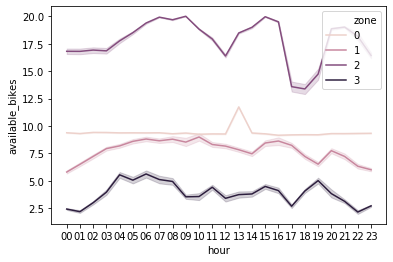

In [30]:
ax = sns.lineplot(x="hour", y="available_bikes", hue="zone",
                  data=df)

   timeDay  available_bike_stands  available_bikes  banking  bike_stands  \
0        0                6165230          5745331   612062     12014907   
1        1                6557577          6148380   643385     12815428   
2        2                3984631          3680512   394043      7734001   
3        3                6443388          6033869   641197     12587481   

   bonus   last_update    number  position_lat  position_lng   zone  
0      0  9.754353e+17  81089978  2.306546e+07 -3.687550e+06  28728  
1      0  1.025163e+18  84278244  2.424150e+07 -3.875835e+06  29570  
2      0  6.278236e+17  52181451  1.484577e+07 -2.373422e+06  18308  
3      0  1.021803e+18  84882611  2.416189e+07 -3.862836e+06  30067  


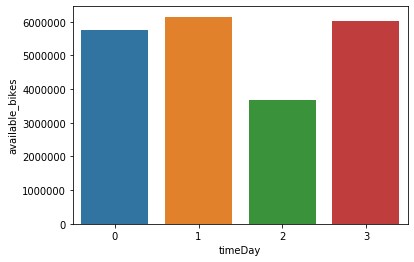

In [75]:

groupedvalues=df.groupby('timeDay').sum().reset_index()
print(groupedvalues)
sns.barplot(x='timeDay',y='available_bikes' ,data=groupedvalues) 

In [58]:
#Una vez preprocesado los datos, lo guardamos en la base de datos con las nuevas columnas
#con = sqlite3.connect("seviBikes.db")
#cur= con.cursor()
#df.to_sql("seviBikes", con,if_exists = 'replace')
